In [122]:
from os import listdir, PathLike, path
import pandas as pd
import gzip
from datetime import date
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame()

In [114]:
path_archive_data = os.path.abspath("../Skipass/scrapper/archive_data/")
path_2_save = os.path.abspath("../Skipass/data/")
marker = False
for i in listdir(path_archive_data):
    with open(os.path.join(path_archive_data,i), 'rb') as file:
        gzip_fd = gzip.GzipFile(fileobj=file)
        df_temp = pd.read_csv(gzip_fd,delimiter=';')
    if marker is False:
        df = df_temp
        marker = True
    else: 
        df = pd.concat([df,df_temp])

#today = date.today().strftime("%d-%m-%Y")
dumpname = 'weather_nivodata.csv'
path_2_save_date = os.path.join(path_2_save,dumpname)    
df.to_csv(path_2_save_date)
    

In [115]:
df

,numer_sta,date,haut_sta,dd,ff,t,td,u,ww,w1,...,ht_neige_alti,neige_fraiche,teneur_eau,grain_predom,grain_nombre,grain_diametr,homogeneite,m_vol_neige,Unnamed: 48,Unnamed: 49
0,7876,20101101060000,1270.0,0,0.000000,278.650000,275.480000,80,0,0,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
1,7457,20101101062000,790.0,0,0.000000,278.650000,mq,mq,0,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
2,7590,20101101062000,1270.0,0,0.000000,277.950000,277.810000,99,0,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
3,7954,20101101065800,1115.0,0,0.000000,278.850000,277.960000,94,60,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
4,7593,20101101070000,1310.0,120,4.000000,277.550000,277.550000,100,0,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,7590,20121031123000,1270.0,180,2.000000,278.150000,276.800000,91,0,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
847,7917,20121031130000,1281.0,0,0.000000,275.850000,273.420000,84,60,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN
848,7931,20121031114000,1665.0,0,6.000000,275.250000,267.840000,58,0,7,...,mq,mq,mq,7,3,mq,mq,mq,NaN,NaN
849,7975,20121031122500,1420.0,310,2.000000,274.450000,272.990000,90,61,6,...,mq,mq,mq,mq,mq,mq,mq,mq,NaN,NaN


In [110]:
df['date'].iloc[0]

20101101060000

In [107]:
df['date'].iloc[0].to_datetime(df['date'],format='%Y%m%d%H%M%S')

AttributeError: 'int' object has no attribute 'to_datetime'

In [119]:
df2 = df
tf_df = pd.to_datetime(df2['date'],format='%Y%m%d%H%M%S',errors='coerce')
df2['date'] = tf_df

In [ ]:
df2['date']

In [132]:
year = 2018

In [135]:
exclude = df2[df2['date'].dt.year == year]

(array([4753., 4967., 3727.,  633.,  426.,  283.,  226.,  191.,  338.,
        1671.]),
 array([17532.25694444, 17568.68923611, 17605.12152778, 17641.55381944,
        17677.98611111, 17714.41840278, 17750.85069444, 17787.28298611,
        17823.71527778, 17860.14756944, 17896.57986111]),
 <BarContainer object of 10 artists>)

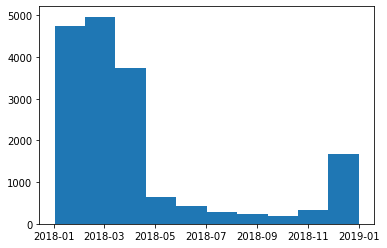

In [139]:
exclude
plt.hist(exclude['date'])

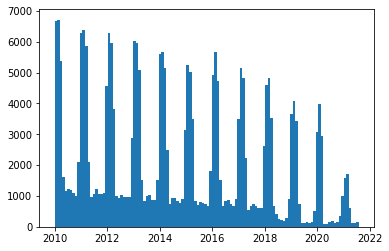

In [140]:
plt.hist(df2['date'],bins=120);

0     2010-11-01 06:00:00
1     2010-11-01 06:20:00
2     2010-11-01 06:20:00
3     2010-11-01 06:58:00
4     2010-11-01 07:00:00
              ...        
846   2012-10-31 12:30:00
847   2012-10-31 13:00:00
848   2012-10-31 11:40:00
849   2012-10-31 12:25:00
850   2012-10-31 12:06:00
Name: date, Length: 245666, dtype: datetime64[ns]